In [2]:
results = [(0.8953787748454914, 0.49555949711590735),
  (0.8477796858427288, 0.4873525645671884),
  (0.8131034481110806, 0.4671248259679861),
  (0.7767669496205677, 0.48328849403038604),
  (0.6744239083188903, 0.36997741580461935),]

results

[(0.8953787748454914, 0.49555949711590735),
 (0.8477796858427288, 0.4873525645671884),
 (0.8131034481110806, 0.4671248259679861),
 (0.7767669496205677, 0.48328849403038604),
 (0.6744239083188903, 0.36997741580461935)]

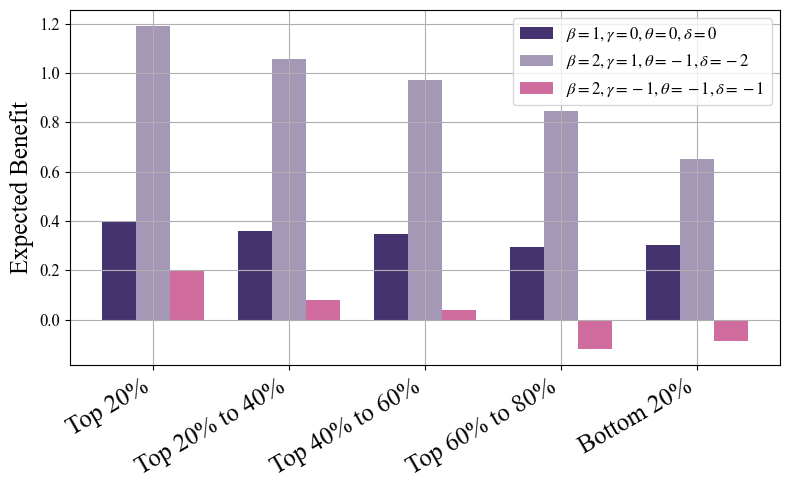

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

# 设置使用Times New Roman字体
rc('font',**{'family':'serif','serif':['Times New Roman']})
plt.rcParams['mathtext.fontset'] = 'stix'  # 用于更好的数学字体渲染

# Assuming previous code context
# results = [np.random.rand(2) for _ in range(10)]  # Placeholder: 10 pairs of random probabilities
bin_labels = ['Top 20%', 'Top 20% to 40%', 'Top 40% to 60%', 'Top 60% to 80%', 'Bottom 20%']  # Bins for the data

params = [
    (1, 0, 0, 0),
    (2, 1, -1, -2),
    (2, -1, -1, -1)
]

params_descriptions = [
    f'$\\beta={beta}, \\gamma={gamma}, \\theta={theta}, \\delta={delta}$'  # LaTeX string
    for beta, gamma, theta, delta in params
]

evaluated_results_all = []

for beta, gamma, theta, delta in params:
    evaluated_results = []
    for p_y_x, p_y_x_prime in results:
        evaluated = (beta - theta) * p_y_x + (gamma - beta) * p_y_x_prime + theta
        evaluated_results.append(evaluated)
    evaluated_results_all.append(evaluated_results)

# 从0-255到0-1范围内的颜色转换
colors = [
    (69/255, 51/255, 112/255), # 暗紫色
    (165/255, 151/255, 182/255), # 浅紫色
    (208/255, 108/255, 157/255) # 粉红色
]


# Plotting with adjusted x-axis labels
plt.figure(figsize=(8, 5))
width = 0.25  # Width of the bars
x = np.arange(len(bin_labels))  # the label locations

for i, (evaluated_results, desc) in enumerate(zip(evaluated_results_all, params_descriptions)):
    plt.bar(x + i*width, evaluated_results, width, color = colors[i], label=desc)

plt.ylabel('Expected Benefit', fontsize=18)
plt.xticks(x + width, bin_labels, rotation=30, fontsize=18, ha='right')  # Rotate and align labels
# plt.legend(title='Parameter Settings', title_fontsize=22, fontsize=20)
plt.legend(fontsize=12)
# 调整y轴刻度字体大小
plt.yticks(fontsize=12)

plt.grid(True)
plt.tight_layout()  # Adjust layout
plt.savefig('bar_plot.png', dpi=300)
plt.show()
